# RainbowSixPrediction

## Import lib

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump
from mpl_toolkits.mplot3d import Axes3D

## get data rs6_clean.csv

player_name	kills	deaths	wins	losess	xp	headshots	melee_kills	games_played	time_played

In [73]:
dataTomClancy  = pd.read_csv('./rs6_clean.csv')
dataTomClancy.shape

(5035, 11)

## print data

In [74]:
dataTomClancy.head(2)

,Unnamed: 0,player_name,kills,deaths,wins,losess,xp,headshots,melee_kills,games_played,time_played
0,0,imBrendyn,39693,27208,3963,2524,87180363,16789,336,6487,2105
1,1,bestboy021,52978,31853,6332,2716,111206504,18196,1204,9048,2440


## clean des data

In [75]:
colonnes = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'melee_kills', 'games_played', 'time_played','wins']
GoodDataTomClancy = dataTomClancy[colonnes]
GoodDataTomClancy.head(3)

,kills,deaths,losess,xp,headshots,melee_kills,games_played,time_played,wins
0,39693,27208,2524,87180363,16789,336,6487,2105,3963
1,52978,31853,2716,111206504,18196,1204,9048,2440,6332
2,32141,31353,2892,89109230,12652,564,7417,2184,4525


## test data

In [76]:
max_values = GoodDataTomClancy.max()
print("Valeurs maximales pour chaque colonne :")
print(max_values)

Valeurs maximales pour chaque colonne :
kills               86396
deaths              82231
losess              17403
xp              235629835
headshots           34098
melee_kills          2393
games_played        22904
time_played          5686
wins                13678
dtype: int64


In [77]:
mediane_wins = GoodDataTomClancy['wins'].median()
print(f"\nMédiane de 'wins': {mediane_wins}")


Médiane de 'wins': 2286.0


In [78]:

au_dessus_mediane = dataTomClancy[dataTomClancy['wins'] > mediane_wins]
print(f"\nMédiane de 'wins' au_dessus_mediane")
au_dessus_mediane.shape



Médiane de 'wins' au_dessus_mediane


(2516, 11)

In [79]:
en_dessous_mediane = dataTomClancy[dataTomClancy['wins'] <= mediane_wins]
print(f"\nMédiane de 'wins' en_dessous_mediane")
en_dessous_mediane.shape


Médiane de 'wins' en_dessous_mediane


(2519, 11)

print data in subplots

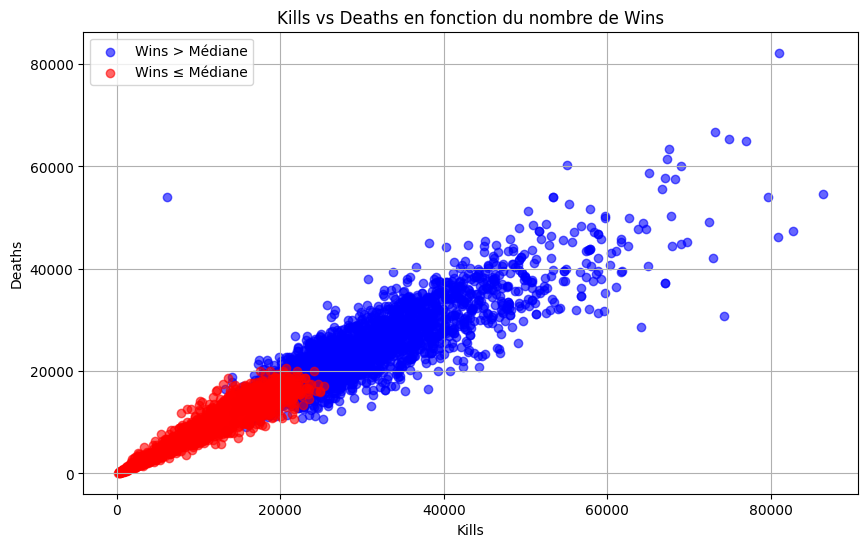

In [80]:

colors = {True: 'blue', False: 'red'}

fig, ax = plt.subplots(figsize=(10, 6))

for key, condition in [
    (True, dataTomClancy['wins'] > mediane_wins),
    (False, dataTomClancy['wins'] <= mediane_wins)
]:
    subset = dataTomClancy[condition]
    ax.scatter(
        x=subset['kills'],
        y=subset['deaths'],
        label='Wins > Médiane' if key else 'Wins ≤ Médiane',
        color=colors[key],
        alpha=0.6
    )

plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.title('Kills vs Deaths en fonction du nombre de Wins')
plt.legend()
plt.grid(True)
plt.show()


Corrélation des autres variables avec 'wins':
wins            1.000000
games_played    0.980924
time_played     0.967955
xp              0.967797
kills           0.966041
headshots       0.942601
deaths          0.937343
losess          0.889367
melee_kills     0.733176
Name: wins, dtype: float64


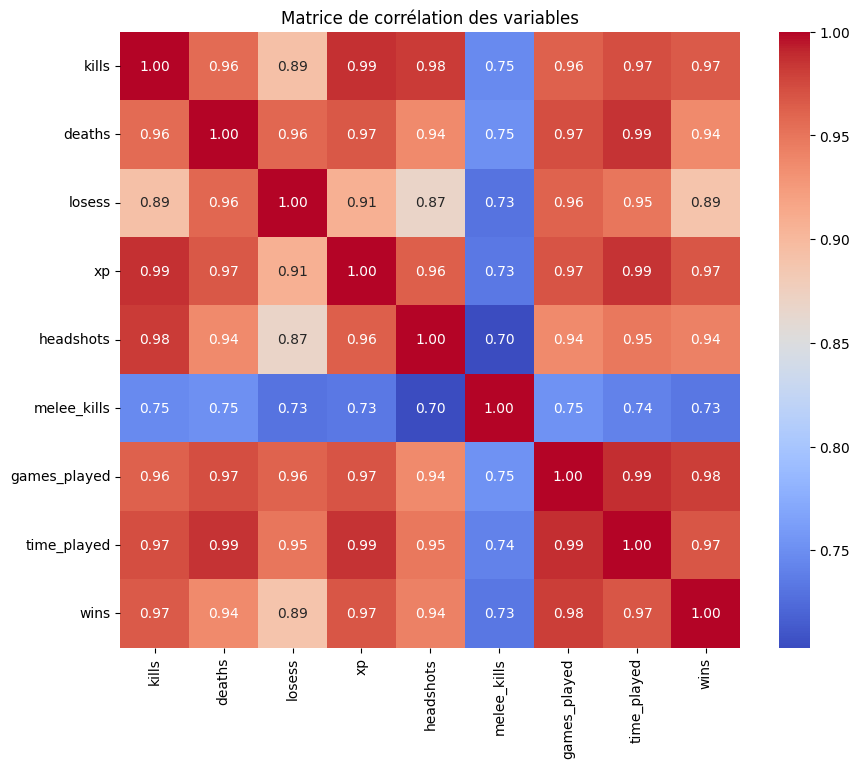

In [81]:
correlation_matrix = GoodDataTomClancy.corr()

correlation_with_wins = correlation_matrix['wins'].sort_values(ascending=False)
print("Corrélation des autres variables avec 'wins':")
print(correlation_with_wins)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables')
plt.show()

| Rang | Variable       | Corrélation avec `wins` | > 75% |
|------|----------------|-------------------------|-------|
| 1    | Kills         | 0.97                    | ✅    |
| 1    | XP            | 0.97                    | ✅    |
| 1    | Time Played   | 0.97                    | ✅    |
| 4    | Deaths        | 0.94                    | ✅    |
| 4    | Headshots     | 0.94                    | ✅    |
| 6    | Games Played  | 0.98                    | ✅    |
| 7    | Losess        | 0.89                    | ✅    |
| 8    | Melee Kills   | 0.73                    | ❌    |


del Melee Kills 


In [82]:
variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played','wins']
GoodDataTomClancy =GoodDataTomClancy[variables]

In [83]:
GoodDataTomClancy.head(2)

,kills,deaths,losess,xp,headshots,games_played,time_played,wins
0,39693,27208,2524,87180363,16789,6487,2105,3963
1,52978,31853,2716,111206504,18196,9048,2440,6332


print data 

In [84]:
sample_data = GoodDataTomClancy.sample(n=100, random_state=13)

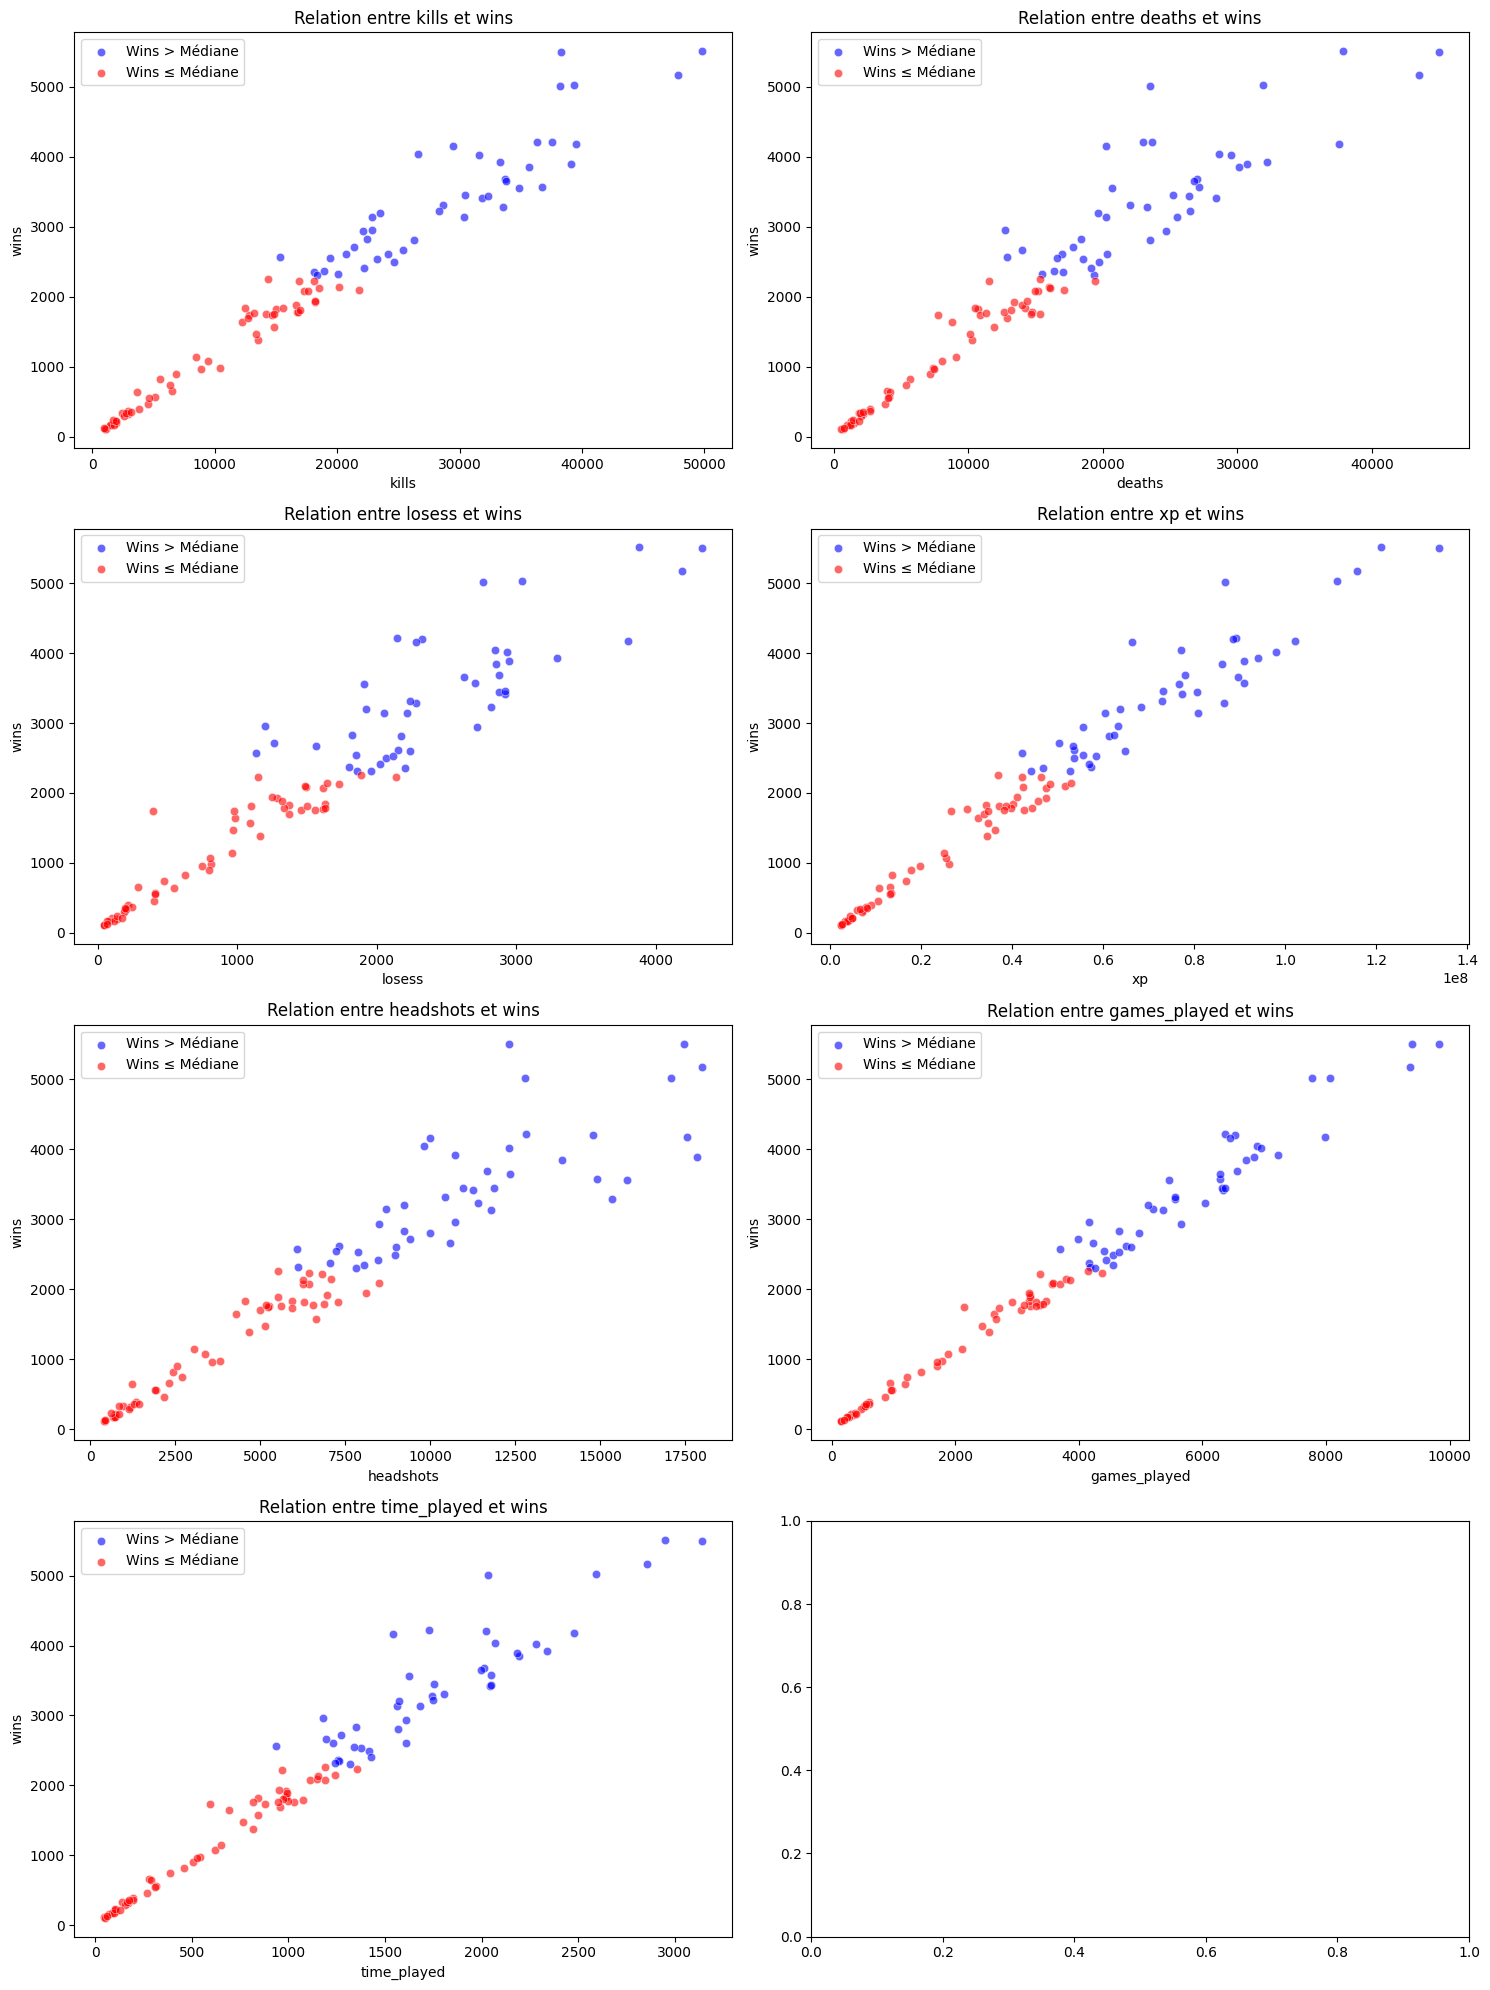

In [85]:

variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    for key, condition in [(True, sample_data['wins'] > mediane_wins), 
                           (False, sample_data['wins'] <= mediane_wins)]:
        subset = sample_data[condition]
        color = 'blue' if key else 'red'
        label = 'Wins > Médiane' if key else 'Wins ≤ Médiane'
        sns.scatterplot(x=var, y='wins', data=subset, ax=axes[i], color=color, label=label, alpha=0.6)
    
    axes[i].set_title(f'Relation entre {var} et wins')
    axes[i].legend()

plt.tight_layout()
plt.show()

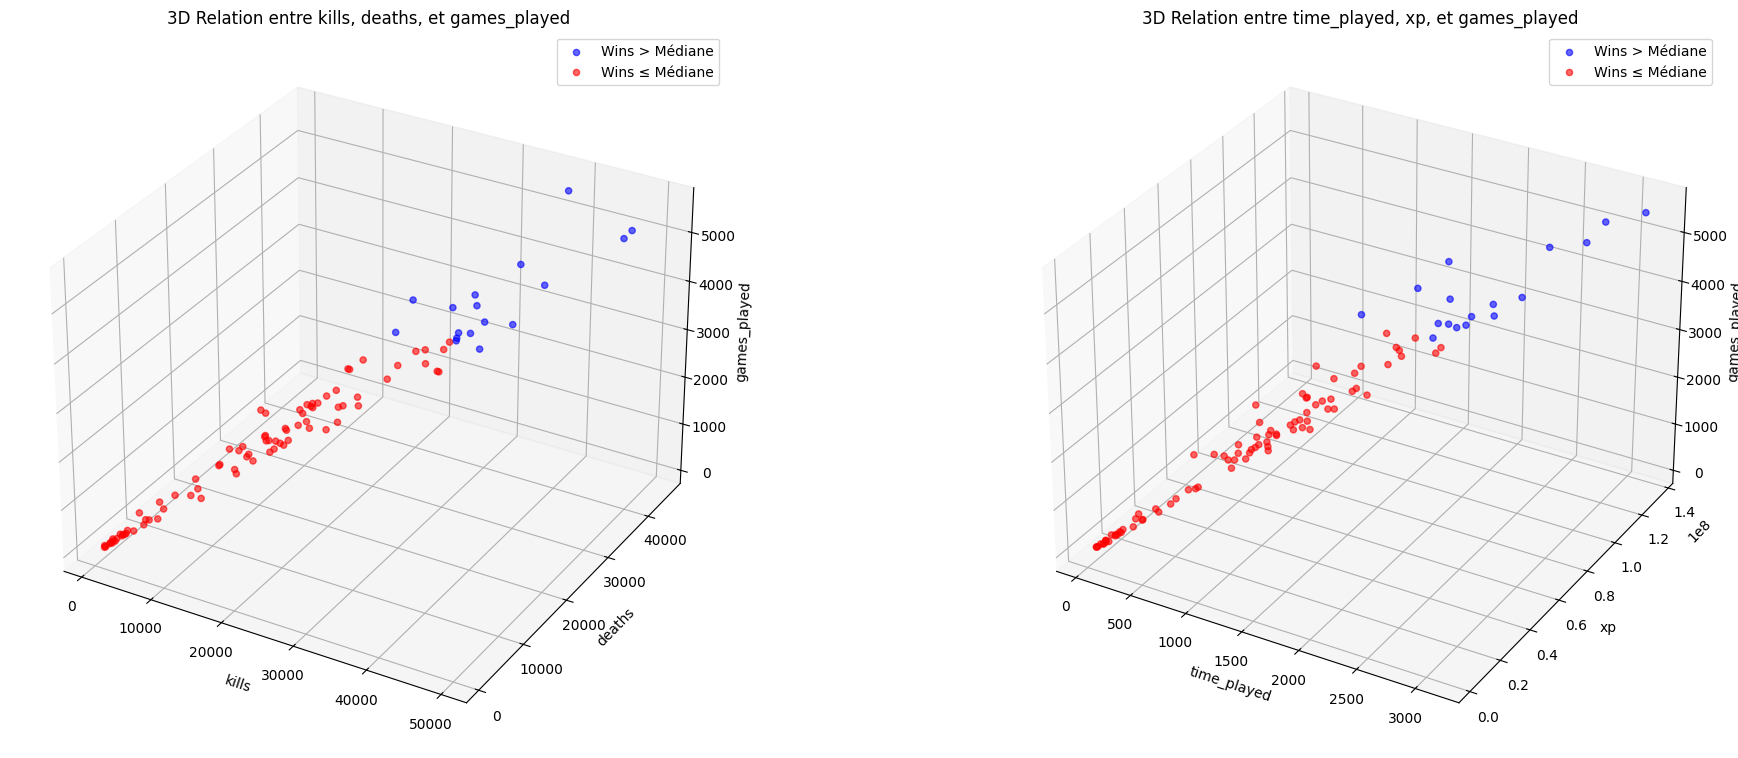

In [86]:
important_pairs = [('kills', 'deaths'), ('time_played', 'xp')]
median_wins = sample_data['games_played'].median()

fig = plt.figure(figsize=(20, 15))

for i, (x_var, y_var) in enumerate(important_pairs):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    
    subset_above = sample_data[sample_data['wins'] > median_wins]
    subset_below = sample_data[sample_data['wins'] <= median_wins]

    ax.scatter(subset_above[x_var], subset_above[y_var], subset_above['wins'], 
               color='blue', alpha=0.6, label='Wins > Médiane')

    ax.scatter(subset_below[x_var], subset_below[y_var], subset_below['wins'], 
               color='red', alpha=0.6, label='Wins ≤ Médiane')

    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_zlabel('games_played')
    ax.set_title(f'3D Relation entre {x_var}, {y_var}, et games_played')
    ax.legend()

plt.tight_layout()
plt.show()


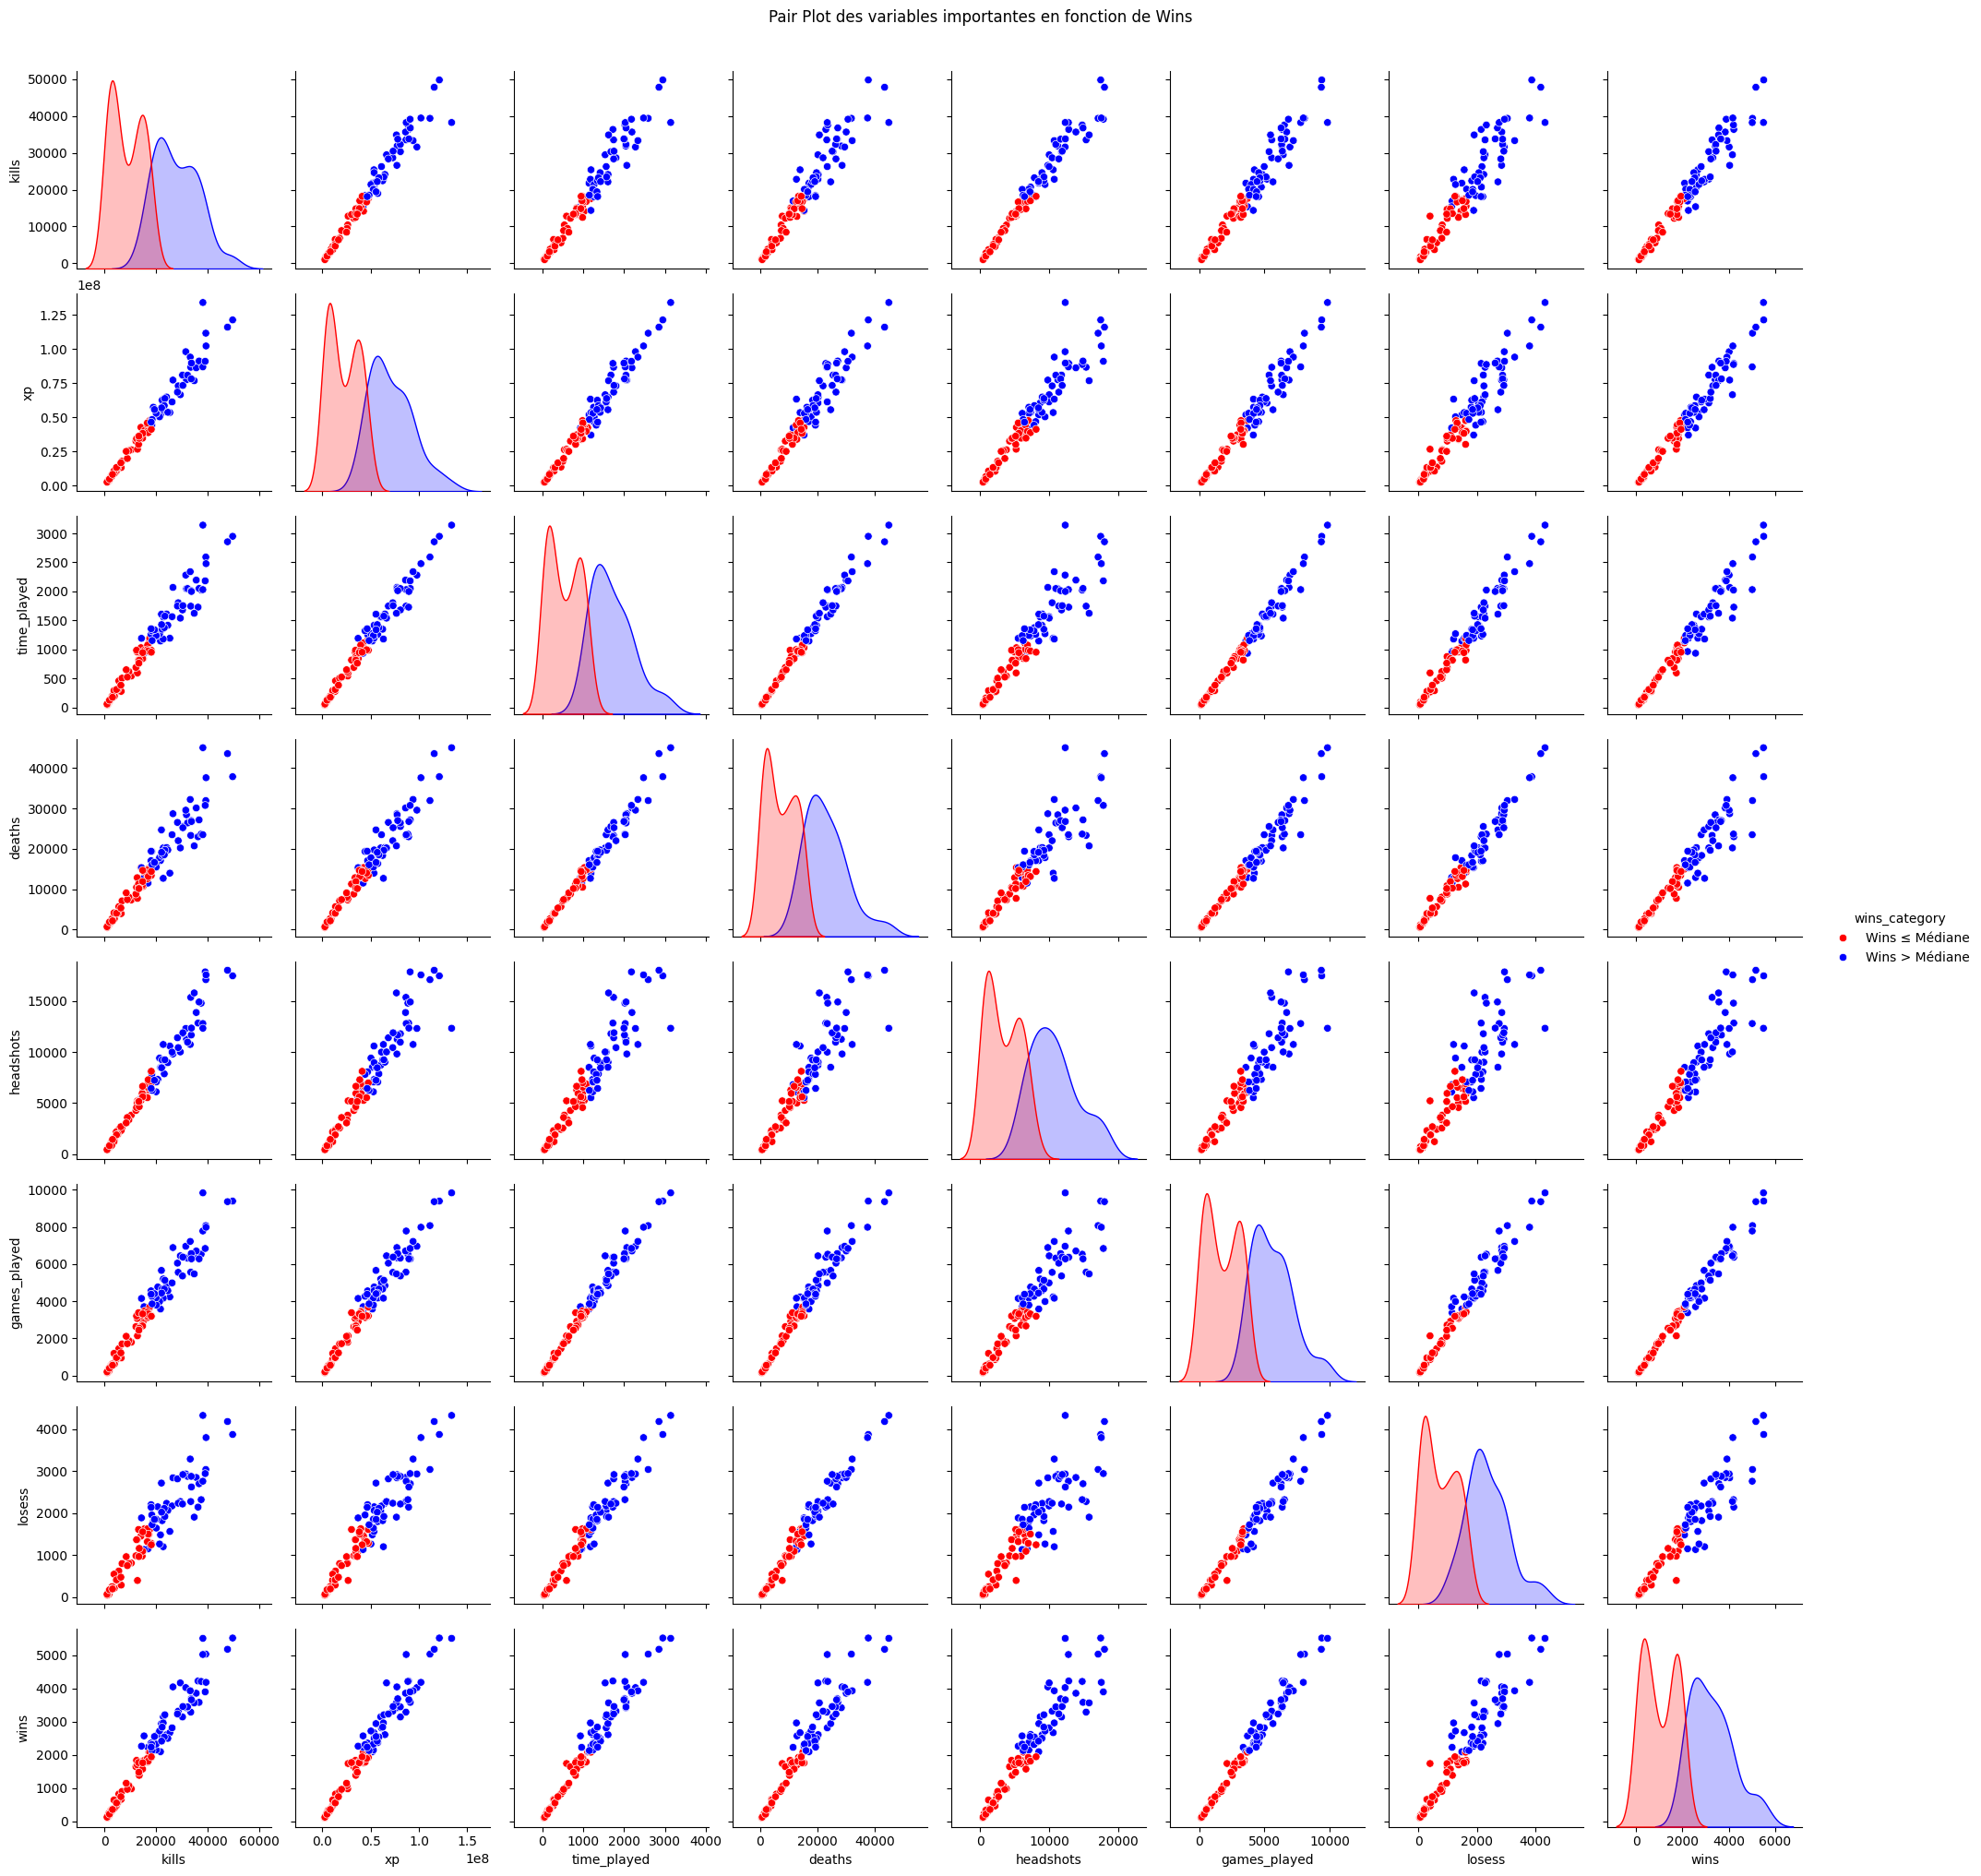

In [87]:
important_vars = ['kills', 'xp', 'time_played', 'deaths', 'headshots', 'games_played', 'losess', 'wins']

sample_data['wins_category'] = np.where(sample_data['wins'] > sample_data['wins'].median(), 'Wins > Médiane', 'Wins ≤ Médiane')

sns.pairplot(sample_data[important_vars + ['wins_category']], hue='wins_category', palette={'Wins > Médiane': 'blue', 'Wins ≤ Médiane': 'red'})
plt.suptitle('Pair Plot des variables importantes en fonction de Wins', y=1.02)
plt.show()


In [88]:
GoodDataTomClancy['median_wins'] = GoodDataTomClancy['wins'].apply(lambda x: 1 if x > mediane_wins else 0)
filtered_wins_category_1 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 1].head(4)
filtered_wins_category_0 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 0].head(4)

print("median_wins : ",mediane_wins)



median_wins :  2286.0


In [89]:
filtered_wins_category_1

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
0,39693,27208,2524,87180363,16789,6487,2105,3963,1
1,52978,31853,2716,111206504,18196,9048,2440,6332,1
2,32141,31353,2892,89109230,12652,7417,2184,4525,1
3,44525,33800,3030,111741958,18692,7753,2481,4723,1


In [90]:
filtered_wins_category_0

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
10,4180,3088,184,10658571,1535,727,217,543,0
14,4281,2930,286,9024784,1806,724,235,438,0
15,7026,5503,412,18730457,2332,1310,393,898,0
18,16922,12395,713,42095357,6715,2977,943,2264,0


## get 10 vfor final test

In [91]:
import numpy as np
random_state_value = np.random.randint(0, 101)
test_final = GoodDataTomClancy.sample(n=10, random_state=random_state_value)
sample_data_GoodDataTomClancy = GoodDataTomClancy.drop(test_final.index)
print("random_state_value for test_final :",random_state_value)


random_state_value for test_final : 39


In [92]:
test_final

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
547,22280,20386,2464,52447220,8755,5278,1449,2814,1
3989,26954,20914,2497,83308422,10442,5968,1756,3471,1
358,15222,10590,958,38888231,5764,2815,895,1857,0
4676,20567,15336,1763,49710778,6326,3786,1193,2023,0
4327,24071,14218,1005,56768766,10487,4755,1573,3750,1
1654,29409,23989,2456,70228533,11202,5952,1921,3496,1
3634,12424,11202,1267,32656824,4152,2774,808,1507,0
1206,32627,22334,2215,70232442,14882,5312,1613,3097,1
4493,32505,24682,2861,88659535,11856,6559,1999,3698,1
3148,33810,24493,3055,86969098,11943,6993,2093,3938,1


In [93]:
sample_data_GoodDataTomClancy.head(2)

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
0,39693,27208,2524,87180363,16789,6487,2105,3963,1
1,52978,31853,2716,111206504,18196,9048,2440,6332,1


In [94]:
print ("Size - GoodDataTomClancy :",GoodDataTomClancy.shape)
print (" = ")
print ("Size - test_final :",test_final.shape)
print (" + ")
print ("Size - sample_data_GoodDataTomClancy :",sample_data_GoodDataTomClancy.shape)

Size - GoodDataTomClancy : (5035, 9)
 = 
Size - test_final : (10, 9)
 + 
Size - sample_data_GoodDataTomClancy : (5025, 9)


## train / test

In [95]:

X = sample_data_GoodDataTomClancy.drop(columns=['median_wins', 'wins','losess','games_played']).apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(sample_data_GoodDataTomClancy['median_wins'], errors='coerce')

print("Longueur de X :", len(X))
print("Longueur de y :", len(y))


Longueur de X : 5025
Longueur de y : 5025


In [96]:
X.head(2)

,kills,deaths,xp,headshots,time_played
0,39693,27208,87180363,16789,2105
1,52978,31853,111206504,18196,2440


In [97]:
y.head(2)

0    1
1    1
Name: median_wins, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [99]:
X_train

,kills,deaths,xp,headshots,time_played
2535,869,528,2371636,429,46
437,30222,22657,81932380,7962,1920
4585,29089,26678,75520416,12160,1971
914,16981,14546,45694432,6806,1101
4251,8496,6252,20562411,3568,514
...,...,...,...,...,...
4434,18864,15382,52734848,8205,1136
467,49954,33065,124406138,19616,2681
3096,6398,4493,15758388,2406,379
3778,16333,8160,37694036,6853,684


In [100]:
y_train

2535    0
437     1
4585    1
914     0
4251    0
       ..
4434    0
467     1
3096    0
3778    0
862     0
Name: median_wins, Length: 3517, dtype: int64

## train DecisionTreeClassifier

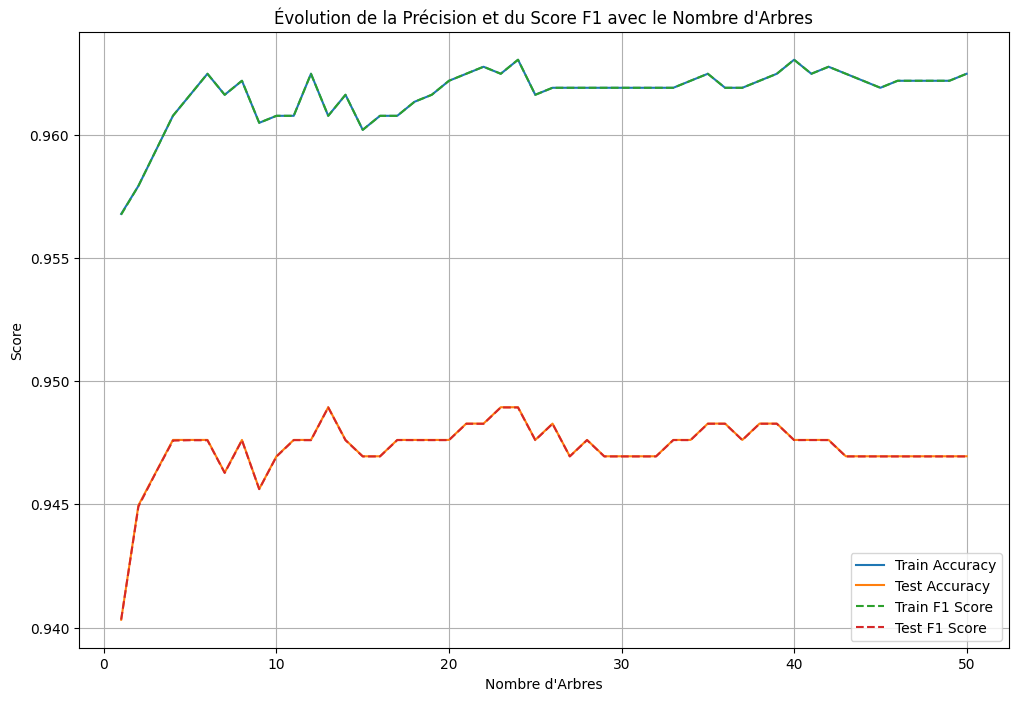

Résultats finaux:
Précision finale sur l'entraînement: 0.96
Précision finale sur le test: 0.95
Score F1 final sur l'entraînement: 0.96
Score F1 final sur le test: 0.95
Précision finale sur le test: 0.95
Rappel final sur le test: 0.95

Matrice de confusion pour l'ensemble de test:
[[688  43]
 [ 37 740]]


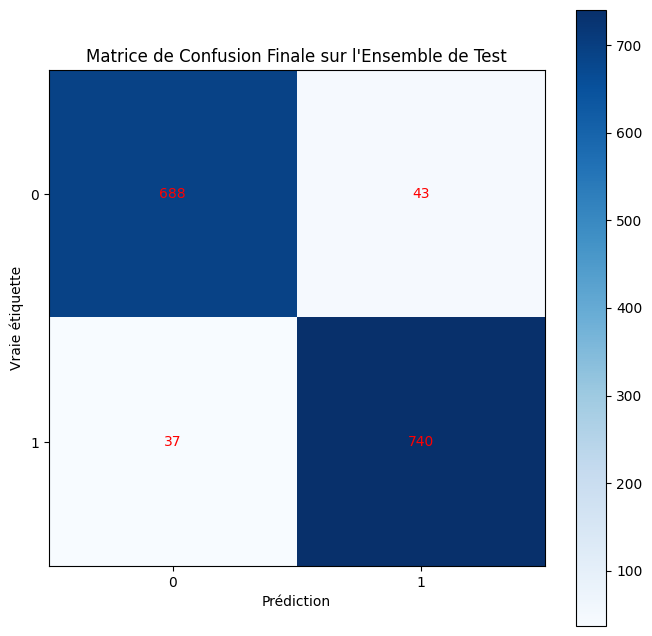

In [101]:
n_estimators = 50 # a changer 
trees = []
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

for i in range(1, n_estimators + 1):
    bootstrap_indices = np.random.choice(np.arange(len(X_train)), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]
    
    tree = DecisionTreeClassifier(max_depth=5, random_state=i)
    tree.fit(X_bootstrap, y_bootstrap)
    trees.append(tree)
    
    train_preds = np.array([tree.predict(X_train) for tree in trees])
    test_preds = np.array([tree.predict(X_test) for tree in trees])
    
    train_pred_majority = (np.sum(train_preds, axis=0) >= i / 2).astype(int)
    test_pred_majority = (np.sum(test_preds, axis=0) >= i / 2).astype(int)
    
    train_accuracy = accuracy_score(y_train, train_pred_majority)
    train_f1 = f1_score(y_train, train_pred_majority, average='weighted')
    test_accuracy = accuracy_score(y_test, test_pred_majority)
    test_f1 = f1_score(y_test, test_pred_majority, average='weighted')
    
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_accuracy)
    test_f1_scores.append(test_f1)
    
    if i == n_estimators:
        final_train_predictions = train_pred_majority
        final_test_predictions = test_pred_majority



# Visualisation de l'évolution des métriques - print
plt.figure(figsize=(12, 8))
plt.plot(range(1, n_estimators + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_estimators + 1), test_accuracies, label='Test Accuracy')
plt.plot(range(1, n_estimators + 1), train_f1_scores, label='Train F1 Score', linestyle='--')
plt.plot(range(1, n_estimators + 1), test_f1_scores, label='Test F1 Score', linestyle='--')
plt.xlabel("Nombre d'Arbres")
plt.ylabel("Score")
plt.title("Évolution de la Précision et du Score F1 avec le Nombre d'Arbres")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calcul des métriques finales - print
final_train_accuracy = accuracy_score(y_train, final_train_predictions)
final_test_accuracy = accuracy_score(y_test, final_test_predictions)
final_train_f1 = f1_score(y_train, final_train_predictions, average='weighted')
final_test_f1 = f1_score(y_test, final_test_predictions, average='weighted')
final_precision = precision_score(y_test, final_test_predictions, average='weighted')
final_recall = recall_score(y_test, final_test_predictions, average='weighted')

print("Résultats finaux:")
print(f"Précision finale sur l'entraînement: {final_train_accuracy:.2f}")
print(f"Précision finale sur le test: {final_test_accuracy:.2f}")
print(f"Score F1 final sur l'entraînement: {final_train_f1:.2f}")
print(f"Score F1 final sur le test: {final_test_f1:.2f}")
print(f"Précision finale sur le test: {final_precision:.2f}")
print(f"Rappel final sur le test: {final_recall:.2f}")

# Matrice de confusion - print
conf_matrix = confusion_matrix(y_test, final_test_predictions)
print("\nMatrice de confusion pour l'ensemble de test:")
print(conf_matrix)

plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion Finale sur l'Ensemble de Test")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
class_labels = np.unique(y_test)
plt.xticks(tick_marks, labels=class_labels)
plt.yticks(tick_marks, labels=class_labels)
plt.ylabel('Vraie étiquette')
plt.xlabel('Prédiction')
plt.grid(False)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{conf_matrix[i, j]}", ha="center", va="center", color="red")

plt.show()


## save model 

In [102]:
dump(tree, 'random_forest_model.joblib')# save the model random_forest_model.joblib !
print("Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.pkl'.")

Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.pkl'.


## test final test

In [103]:
X_final_test = test_final.drop(columns=['median_wins', 'wins','losess','games_played'])
y_final_test = test_final['median_wins']

X_final_test = X_final_test[X_train.columns] 

final_predictions = []
for tree in trees:
    pred = tree.predict(X_final_test)
    final_predictions.append(pred)

final_predictions = np.array(final_predictions)

final_pred_majority = (np.sum(final_predictions, axis=0) >= n_estimators / 2).astype(int)

results = pd.DataFrame({
    'Actual': y_final_test.values,
    'Predicted': final_pred_majority
})
results['Result'] = np.where(results['Actual'] == results['Predicted'], '✅', '❌')
results.index = test_final.index 

display(results)



,Actual,Predicted,Result
547,1,1,✅
3989,1,1,✅
358,0,0,✅
4676,0,1,❌
4327,1,1,✅
1654,1,1,✅
3634,0,0,✅
1206,1,1,✅
4493,1,1,✅
3148,1,1,✅


In [104]:
X_final_test

,kills,deaths,xp,headshots,time_played
547,22280,20386,52447220,8755,1449
3989,26954,20914,83308422,10442,1756
358,15222,10590,38888231,5764,895
4676,20567,15336,49710778,6326,1193
4327,24071,14218,56768766,10487,1573
1654,29409,23989,70228533,11202,1921
3634,12424,11202,32656824,4152,808
1206,32627,22334,70232442,14882,1613
4493,32505,24682,88659535,11856,1999
3148,33810,24493,86969098,11943,2093
